# Bankruptcy prediction 

## Data Expectation

In [275]:
import pandas as pd
# Step 1: Load
data = pd.read_csv("Data_TaiwanEconomic_1999_2009.csv")

In [276]:
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [277]:
data.columns.values

array(['Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Op

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [393]:
print("Number of Records : ",data.shape[0],"\nNumber of Features : ",data.shape[1])

Number of Records :  6819 
Number of Features :  96


In [280]:
print(data.isnull().values.any())

False


In [281]:
descriptive_stats = data.describe()

In [282]:
descriptive_stats

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [415]:
descriptive_stats.T.head(50)

count          mean  \
Bankrupt?                                           6819.0  3.226280e-02   
 ROA(C) before interest and depreciation before...  6819.0  5.051796e-01   
 ROA(A) before interest and % after tax             6819.0  5.586249e-01   
 ROA(B) before interest and depreciation after tax  6819.0  5.535887e-01   
 Operating Gross Margin                             6819.0  6.079480e-01   
 Realized Sales Gross Margin                        6819.0  6.079295e-01   
 Operating Profit Rate                              6819.0  9.987551e-01   
 Pre-tax net Interest Rate                          6819.0  7.971898e-01   
 After-tax net Interest Rate                        6819.0  8.090836e-01   
 Non-industry income and expenditure/revenue        6819.0  3.036229e-01   
 Continuous interest rate (after tax)               6819.0  7.813814e-01   
 Operating Expense Rate                             6819.0  1.995347e+09   
 Research and development expense rate              6819.0  1.950427e+09   
 Cash flow rate                                     6819.0  4.674312e-01   
 Interest-bearing debt interest rate                6819.0  1.644801e+07   
 Tax rate (A)                                       6819.0  1.150007e-01   
 Net Value Per Share (B)                            6819.0  1.906606e-01   
 Net Value Per Share (A)                            6819.0  1.906332e-01   
 Net Value Per Share (C)                            6819.0  1.906724e-01   
 Persistent EPS in the Last Four Seasons            6819.0  2.288129e-01   
 Cash Flow Per Share                                6819.0  3.234819e-01   
 Revenue Per Share (Yuan ¥)                         6819.0  1.328641e+06   
 Operating Profit Per Share (Yuan ¥)                6819.0  1.090907e-01   
 Per Share Net profit before tax (Yuan ¥)           6819.0  1.843606e-01   
 Realized Sales Gross Profit Growth Rate            6819.0  2.240785e-02   
 Operating Profit Growth Rate                       6819.0  8.479800e-01   
 After-tax Net Profit Growth Rate                   6819.0  6.891461e-01   
 Regular Net Profit Growth Rate                     6819.0  6.891500e-01   
 Continuous Net Profit Growth Rate                  6819.0  2.176390e-01   
 Total Asset Growth Rate                            6819.0  5.508097e+09   
 Net Value Growth Rate                              6819.0  1.566212e+06   
 Total Asset Return Growth Rate Ratio               6819.0  2.642475e-01   
 Cash Reinvestment %                                6819.0  3.796767e-01   
 Current Ratio                                      6819.0  4.032850e+05   
 Quick Ratio                                        6819.0  8.376595e+06   
 Interest Expense Ratio                             6819.0  6.309910e-01   
 Total debt/Total net worth                         6819.0  4.416337e+06   
 Debt ratio %                                       6819.0  1.131771e-01   
 Net worth/Assets                                   6819.0  8.868229e-01   
 Long-term fund suitability ratio (A)               6819.0  8.782734e-03   
 Borrowing dependency                               6819.0  3.746543e-01   
 Contingent liabilities/Net worth                   6819.0  5.968277e-03   
 Operating profit/Paid-in capital                   6819.0  1.089767e-01   
 Net profit before tax/Paid-in capital              6819.0  1.827150e-01   
 Inventory and accounts receivable/Net value        6819.0  4.024593e-01   
 Total Asset Turnover                               6819.0  1.416056e-01   
 Accounts Receivable Turnover                       6819.0  1.278971e+07   
 Average Collection Days                            6819.0  9.826221e+06   
 Inventory Turnover Rate (times)                    6819.0  2.149106e+09   
 Fixed Assets Turnover Frequency                    6819.0  1.008596e+09   

                                                             std  min  \
Bankrupt?                                           1.767102e-01  0.0   
 ROA(C) before interest and de

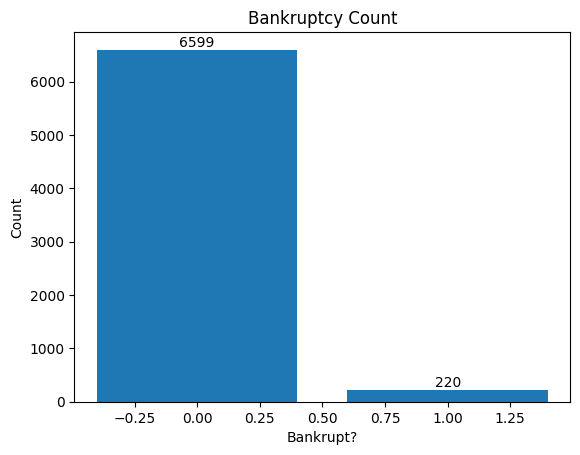

In [284]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data
# Replace 'data' with your actual DataFrame name

# Count the occurrences of each value in the 'Bankrupt?' column
bankrupt_counts = data['Bankrupt?'].value_counts()

# Create a bar chart
plt.bar(bankrupt_counts.index, bankrupt_counts.values)

# Customize the chart
plt.title('Bankruptcy Count')
plt.xlabel('Bankrupt?')
plt.ylabel('Count')

# Add labels to the bars
for index, value in enumerate(bankrupt_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show the chart
plt.show()


In [285]:
220/6599

0.03333838460372784

In [286]:
1-0.03333838460372784

0.9666616153962722

# Features

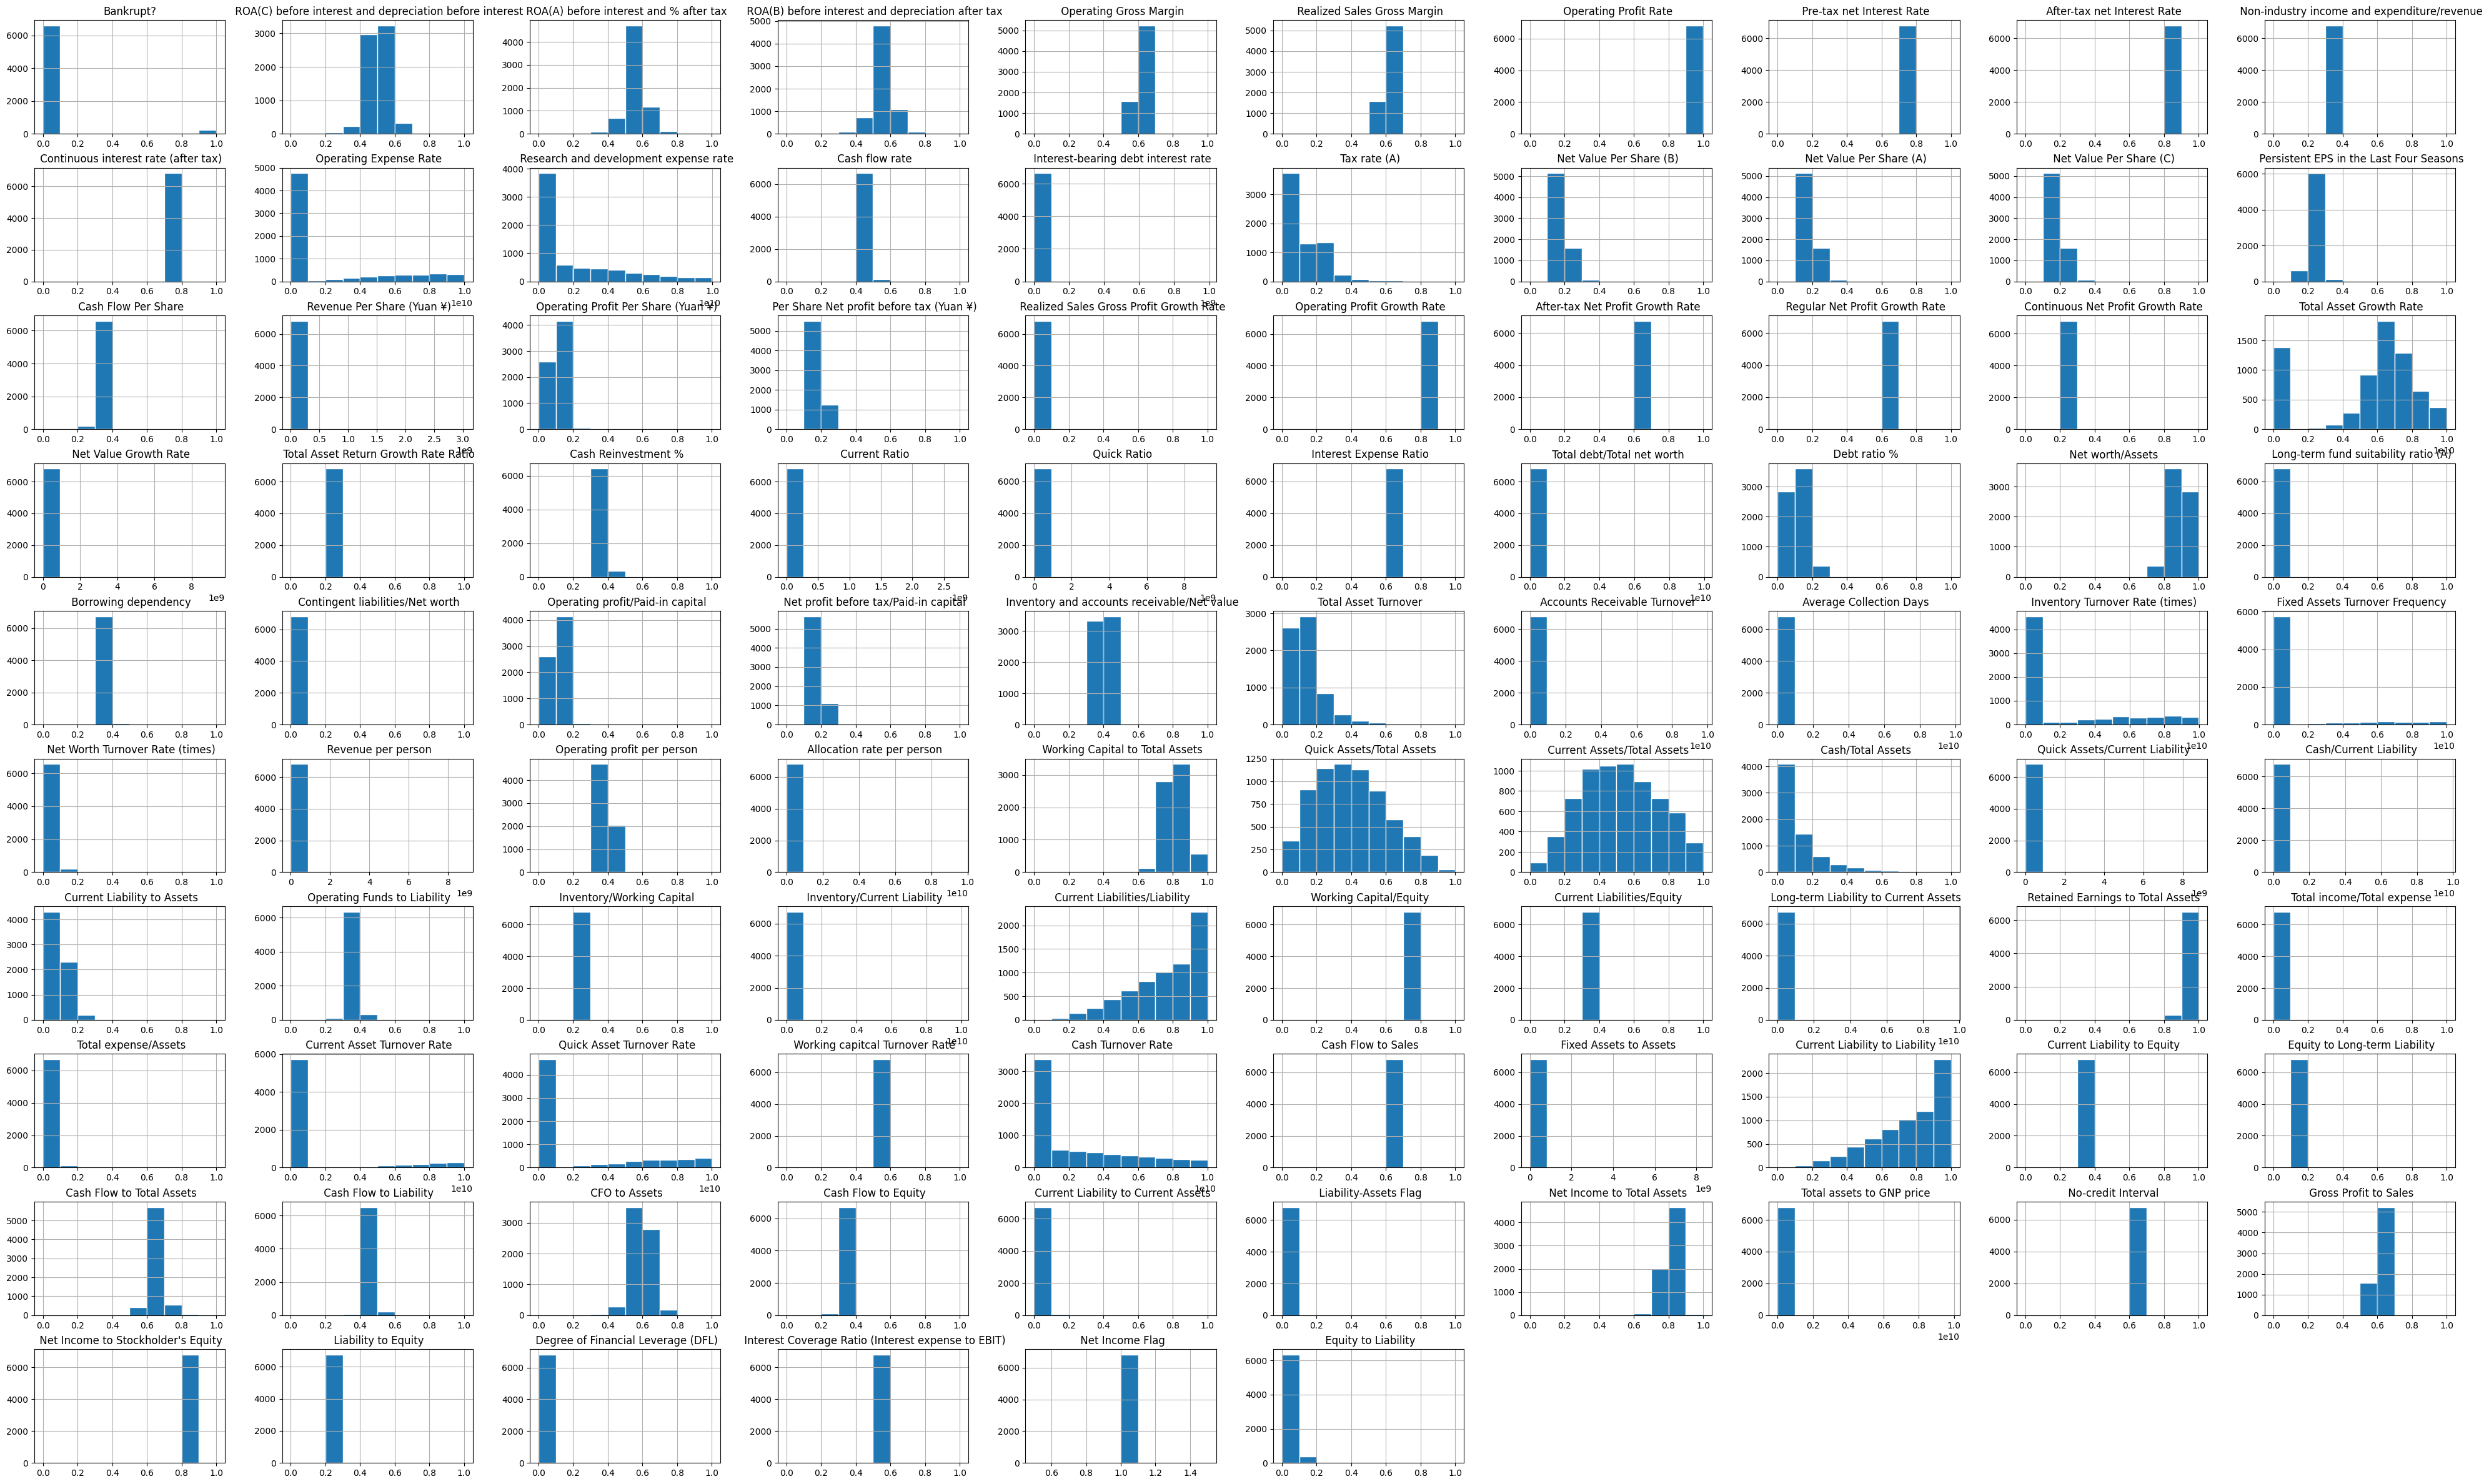

In [288]:
data.hist(figsize=(50,30), edgecolor='White')
plt.show()

## The ungarnered Correlation Matrix Visualized

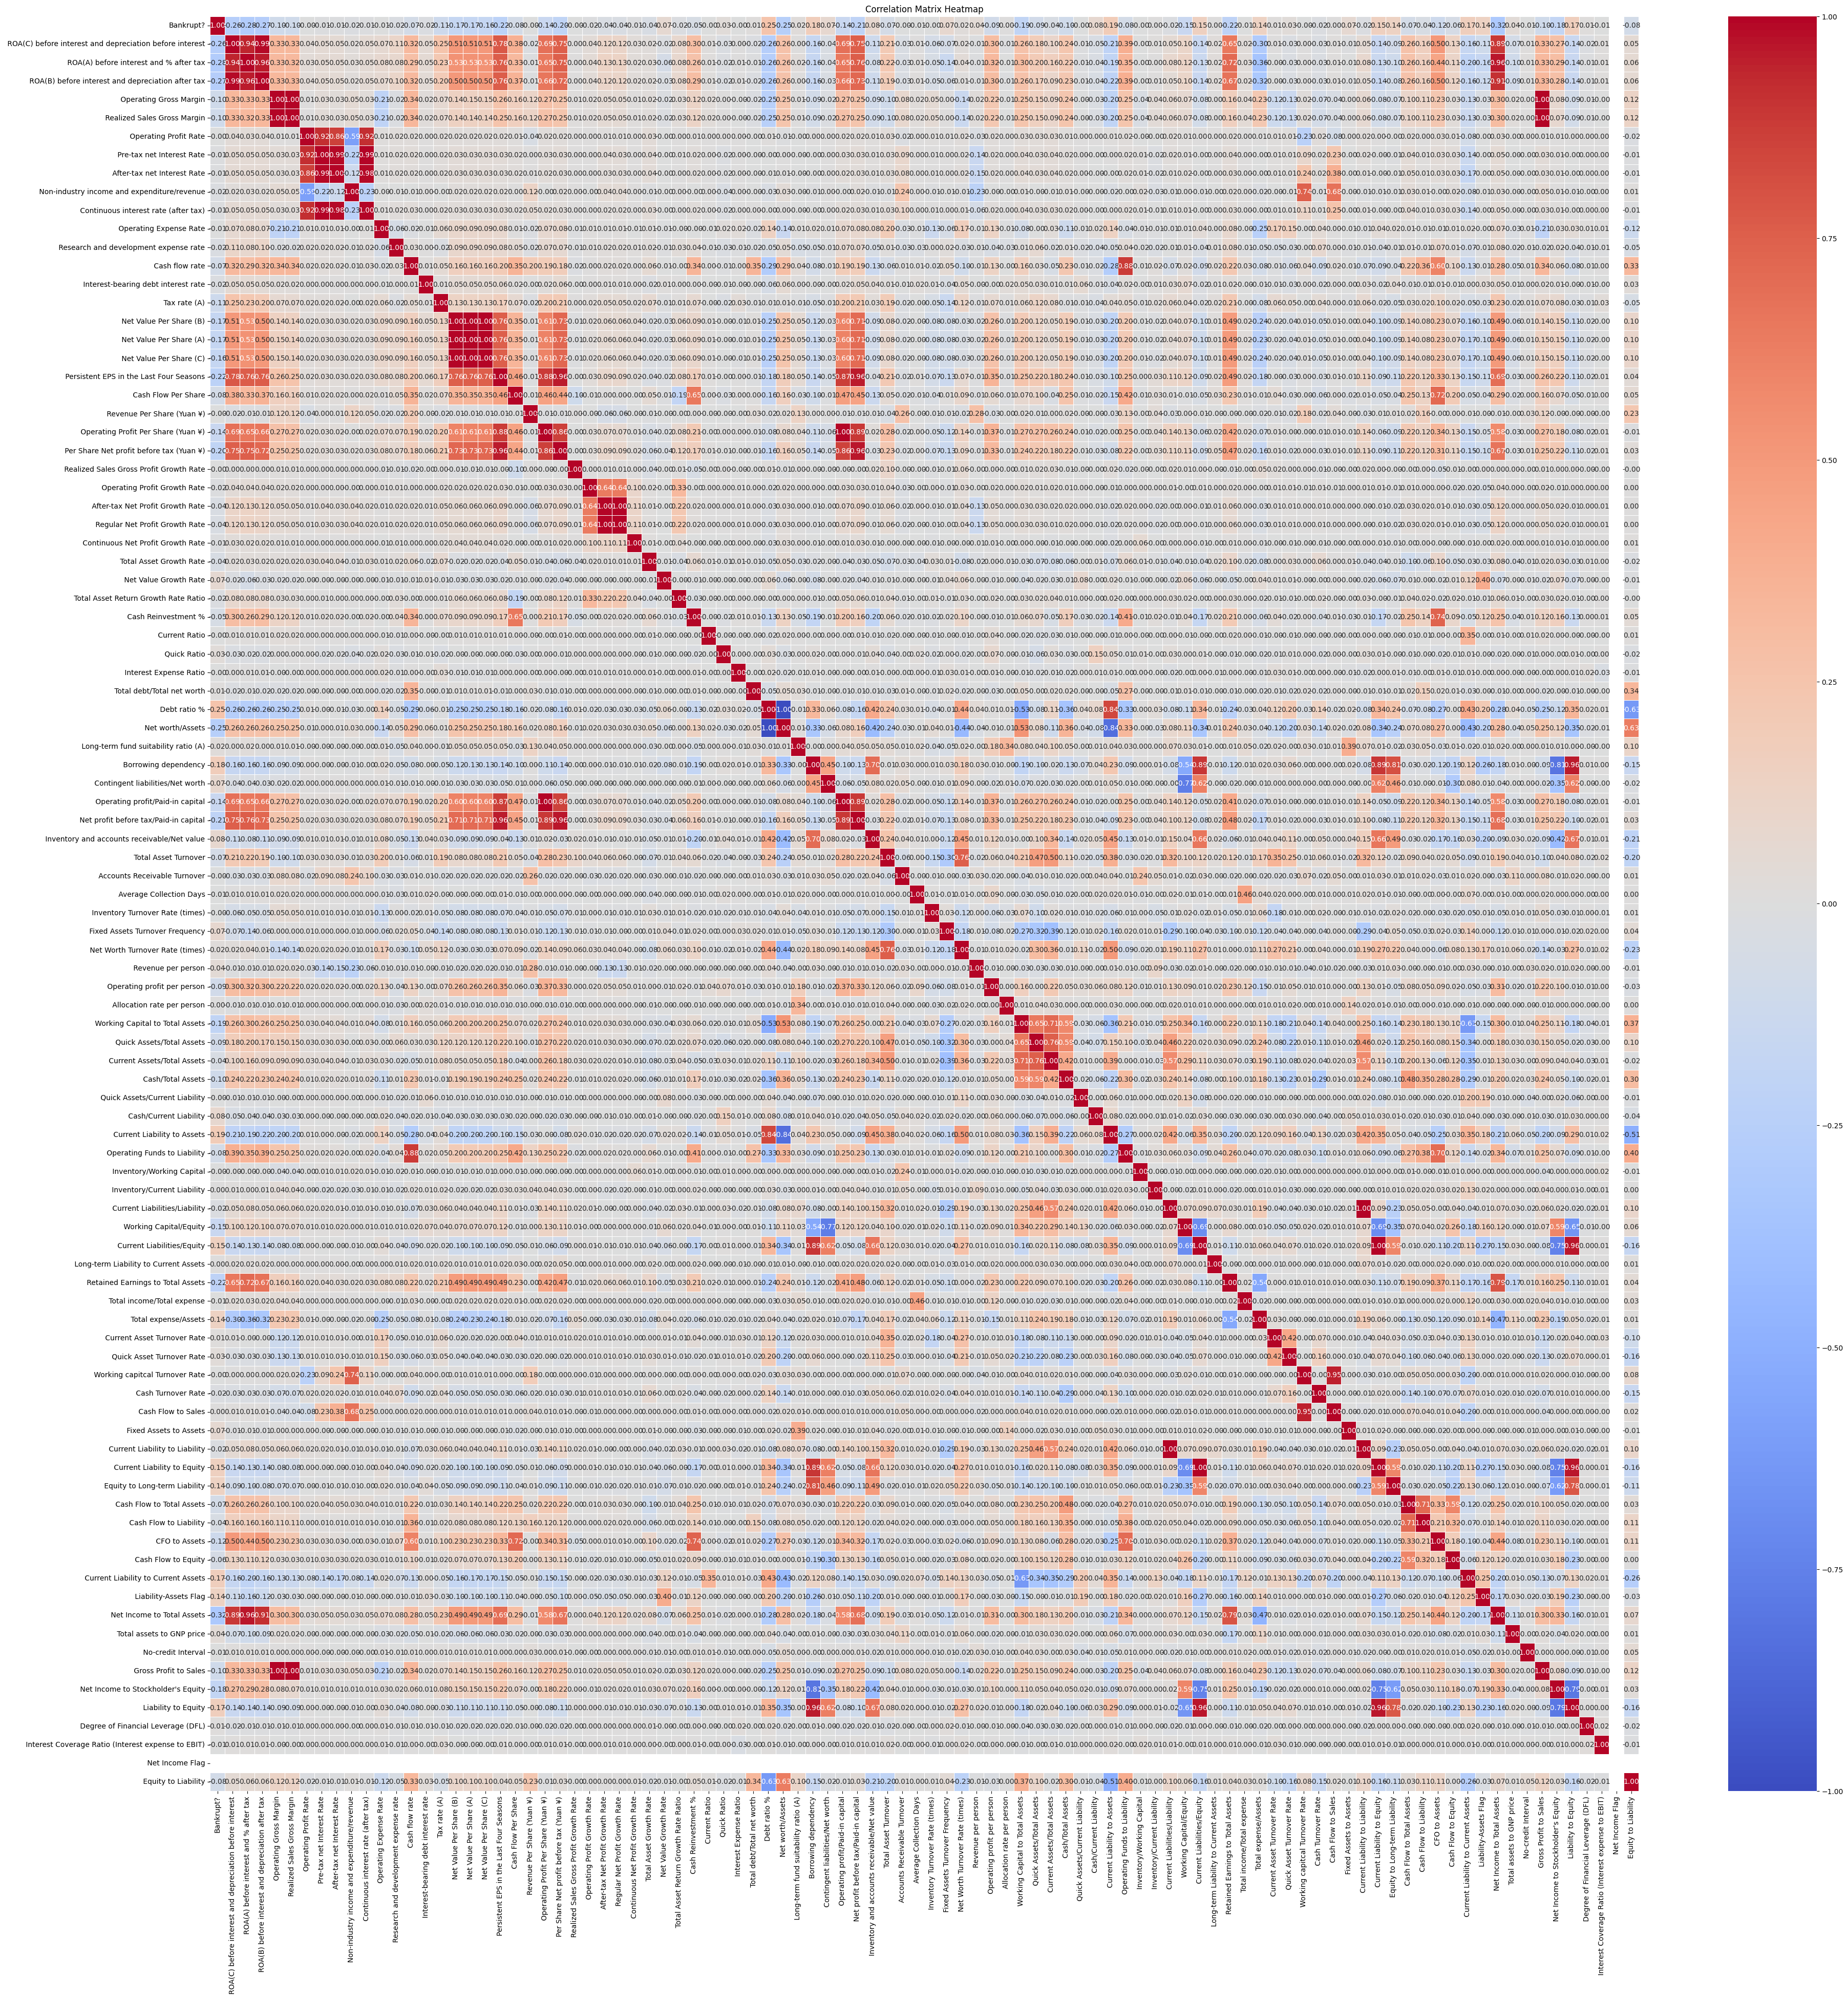

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data
# Replace 'data' with your actual DataFrame name

# Calculate the correlation coefficients
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(45, 45))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Using pandas to select variables with a correlation above a given threshold threshold

In [383]:
# Calculate the correlation coefficients
correlation_matrix = data.corr()

# Select the correlation between "Bankrupt?" and all other variables
bankrupt_correlation = correlation_matrix['Bankrupt?'].drop('Bankrupt?')

# Set a correlation threshold (absolute value) to select variables
correlation_threshold = 0.2

# Select variables with correlation above the threshold
selected_variables = bankrupt_correlation[abs(bankrupt_correlation) > correlation_threshold]

# Print the selected variables and their correlation coefficients
print(selected_variables)

ROA(C) before interest and depreciation before interest   -0.260807
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
Persistent EPS in the Last Four Seasons                   -0.219560
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Debt ratio %                                               0.250161
Net worth/Assets                                          -0.250161
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64


In [385]:
selected_variables

ROA(C) before interest and depreciation before interest   -0.260807
ROA(A) before interest and % after tax                    -0.282941
ROA(B) before interest and depreciation after tax         -0.273051
Persistent EPS in the Last Four Seasons                   -0.219560
Per Share Net profit before tax (Yuan ¥)                  -0.201395
Debt ratio %                                               0.250161
Net worth/Assets                                          -0.250161
Net profit before tax/Paid-in capital                     -0.207857
Retained Earnings to Total Assets                         -0.217779
Net Income to Total Assets                                -0.315457
Name: Bankrupt?, dtype: float64

## Visualization

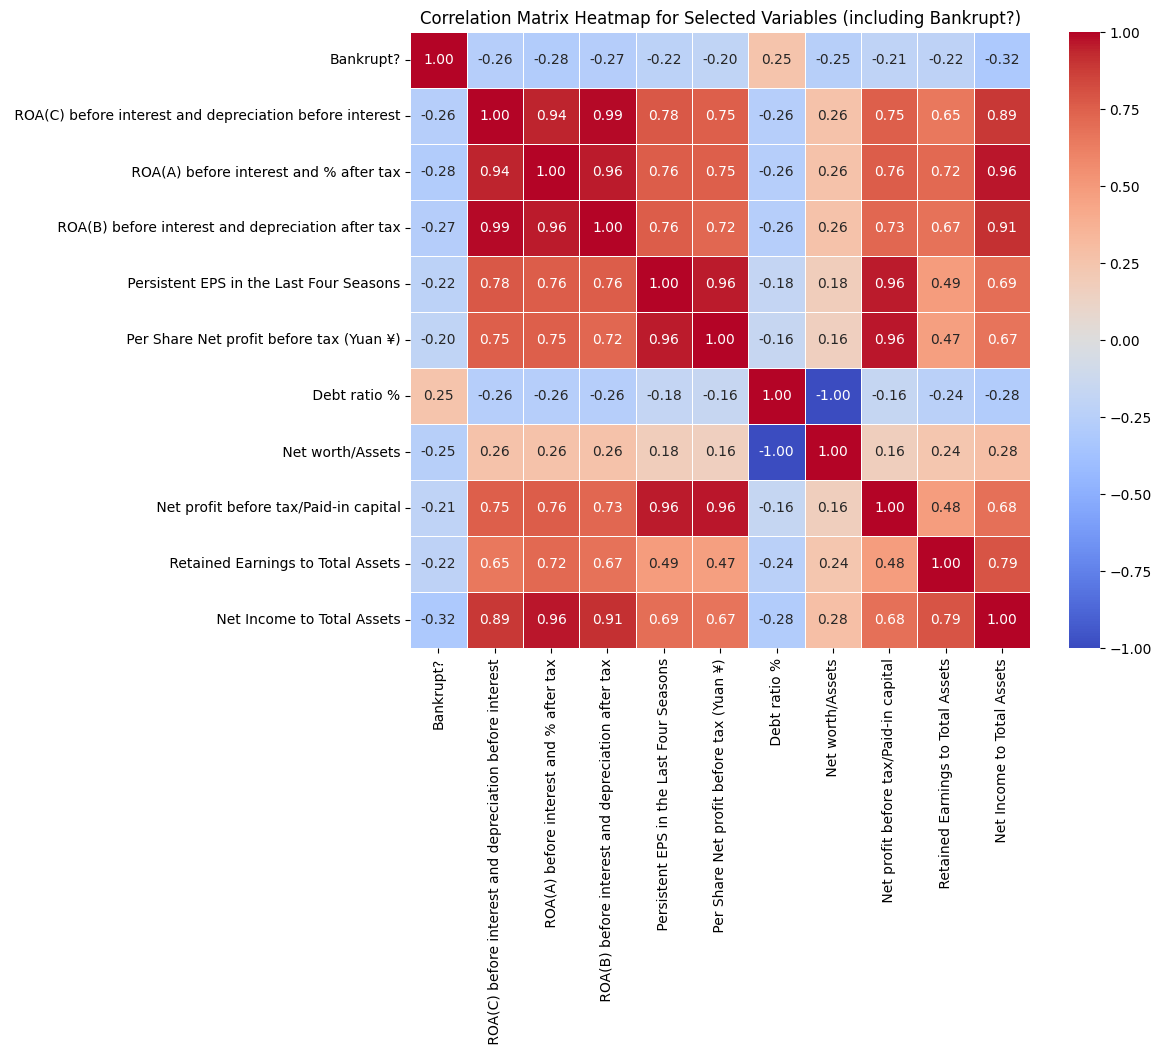

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data
# Replace 'data' with your actual DataFrame name

# Calculate the correlation coefficients with 'Bankrupt?'
correlation_matrix = data.corr()

# Select variables with highest absolute correlation with 'Bankrupt?' above a threshold (e.g., 0.2)
correlation_threshold = 0.2
selected_variables = correlation_matrix['Bankrupt?'][abs(correlation_matrix['Bankrupt?']) > correlation_threshold].index

# Create a correlation matrix for the selected variables including 'Bankrupt?'
selected_correlation_matrix = data[selected_variables].corr()

# Create a heatmap for the selected correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Selected Variables (including Bankrupt?)')
plt.show()


## Visualizing the Effect of ROA on Bankruptcy using scatterplots

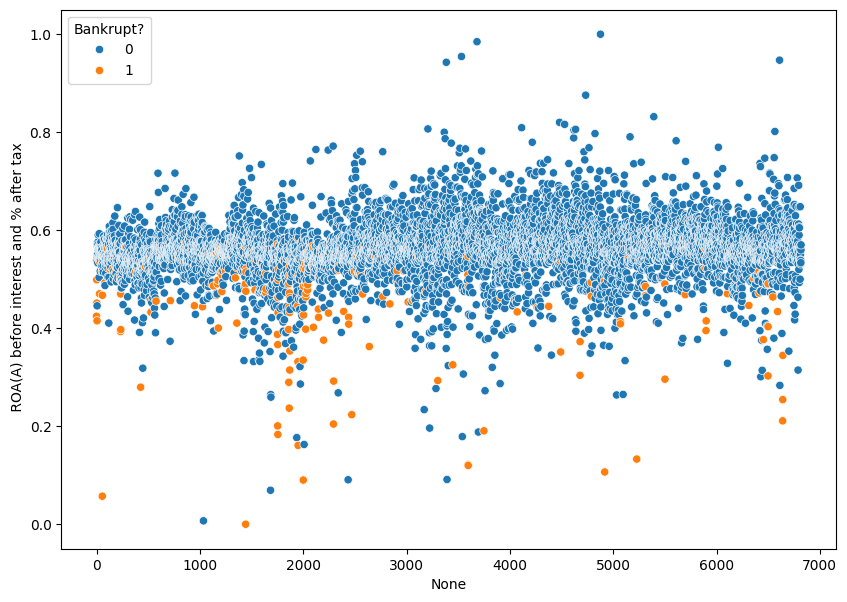

In [297]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' ROA(A) before interest and % after tax', hue = 'Bankrupt?', data = data)
plt.show()

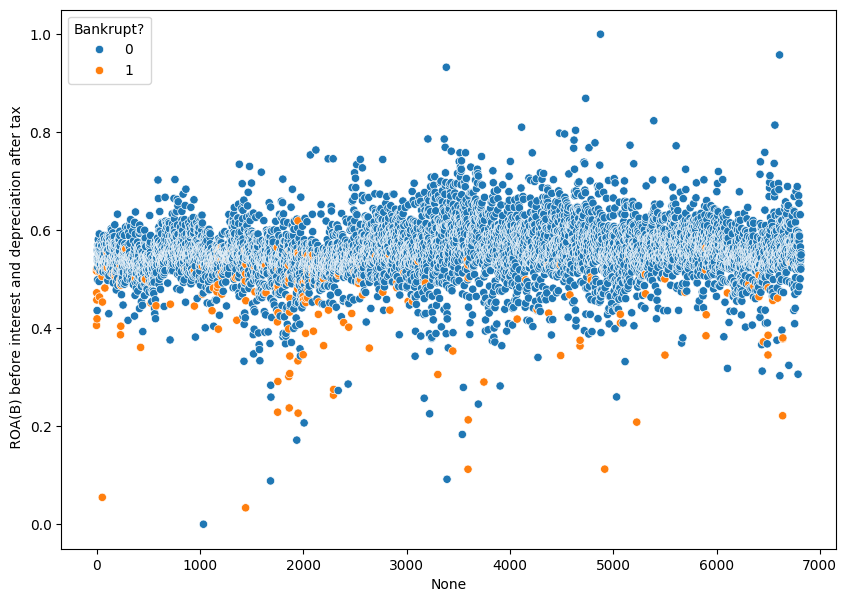

In [298]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' ROA(B) before interest and depreciation after tax', hue = 'Bankrupt?', data = data)
plt.show()

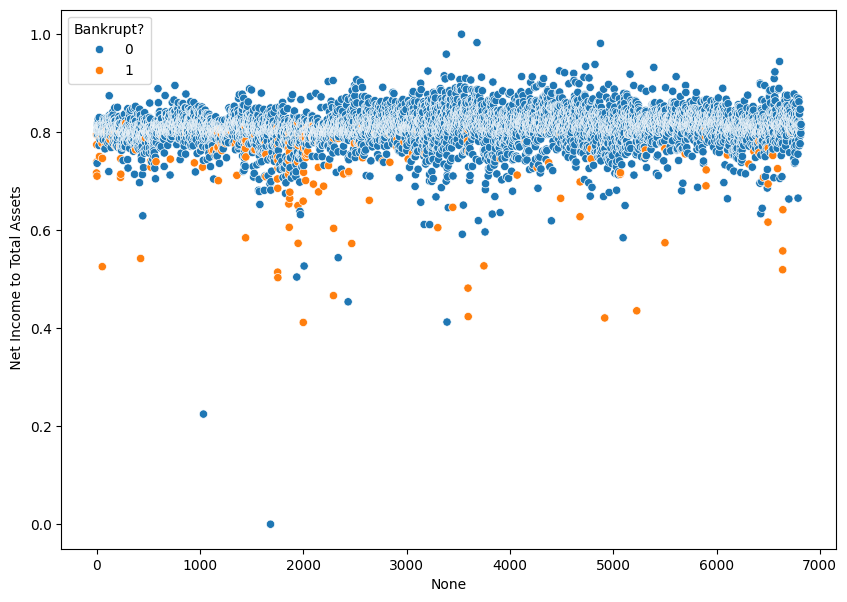

In [299]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Net Income to Total Assets', hue = 'Bankrupt?', data = data)
plt.show()

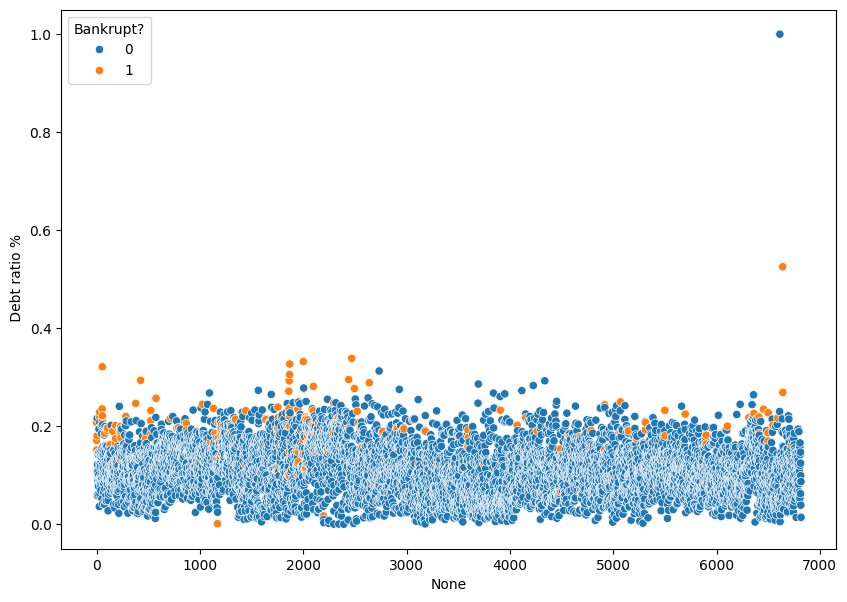

In [300]:
#plotting all the ROA(A) before interest and %after tax samples as scatter plot
fig = plt.figure(figsize = (10,7))
sns.scatterplot(x = data.index ,y = ' Debt ratio %', hue = 'Bankrupt?', data = data)
plt.show()

## Setting up the pandas dataframe for selected variables

In [406]:
# Create the new DataFrame 'financial_data' with the selected columns
financial_data = data[
    [' ROA(C) before interest and depreciation before interest',
     ' ROA(A) before interest and % after tax',
     ' ROA(B) before interest and depreciation after tax',
     ' Persistent EPS in the Last Four Seasons',
     ' Per Share Net profit before tax (Yuan ¥)',
     ' Debt ratio %',
     ' Net worth/Assets',
     ' Net profit before tax/Paid-in capital',
     ' Retained Earnings to Total Assets',
     ' Net Income to Total Assets']
].copy()


# Print the first few rows of the new DataFrame to verify the data
financial_data.head(10)

ROA(C) before interest and depreciation before interest  \
0                                           0.370594         
1                                           0.464291         
2                                           0.426071         
3                                           0.399844         
4                                           0.465022         
5                                           0.388680         
6                                           0.390923         
7                                           0.508361         
8                                           0.488519         
9                                           0.495686         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   
5                                0.415177   
6                                0.445704   
7                                0.570922   
8                                0.545137   
9                                0.550916   

   ROA(B) before interest and depreciation after tax  \
0                                           0.405750   
1                                           0.516730   
2                                           0.472295   
3                                           0.457733   
4                                           0.522298   
5                                           0.419134   
6                                           0.436158   
7                                           0.559077   
8                                           0.543284   
9                                           0.542963   

   Persistent EPS in the Last Four Seasons  \
0                                 0.169141   
1                                 0.208944   
2                                 0.180581   
3                                 0.193722   
4                                 0.212537   
5                                 0.174435   
6                                 0.161482   
7                                 0.225206   
8                                 0.218398   
9                                 0.217831   

   Per Share Net profit before tax (Yuan ¥)  Debt ratio %  Net worth/Assets  \
0                                  0.138736      0.207576          0.792424   
1                                  0.169918      0.171176          0.828824   
2                                  0.142803      0.207516          0.792484   
3                                  0.148603      0.151465          0.848535   
4                                  0.168412      0.106509          0.893491   
5                                  0.138811      0.180427          0.819573   
6                                  0.128945      0.216102          0.783898   
7                                  0.180462      0.108202          0.891798   
8                                  0.173157      0.058591          0.941409   
9                                  0.176621      0.121293          0.878707   

   Net profit before tax/Paid-in capital  Retained Earnings to Total Assets  \
0                               0.137757                           0.903225   
1                               0.168962                           0.931065   
2                               0.148036                           0.909903   
3                               0.147561                           0.906902   
4                               0.167461                           0.913850   
5                               0.137825                           0.903041   
6                               0.127939                           0.911441   
7                               0.179519                           0.935449   
8                               0.172159                           0.935200   
9                               0.175658

## Some Descriptive Statistics for the smaller seleted dataset

In [404]:
financial_data.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505180         
std                                             0.060686         
min                                             0.000000         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             1.000000         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Persistent EPS in the Last Four Seasons  \
count                              6819.000000   
mean                                  0.228813   
std                                   0.033263   
min                                   0.000000   
25%                                   0.214711   
50%                                   0.224544   
75%                                   0.238820   
max                                   1.000000   

       Per Share Net profit before tax (Yuan ¥)  Debt ratio %  \
count                               6819.000000   6819.000000   
mean                                   0.184361      0.113177   
std                                    0.033180      0.053920   
min                                    0.000000      0.000000   
25%                                    0.170370      0.072891   
50%                                    0.179709      0.111407   
75%                                    0.193493      0.148804   
max                                    1.000000      1.000000   

       Net worth/Assets  Net profit before tax/Paid-in capital  \
count       6819.000000                            6819.000000   
mean           0.886823                               0.182715   
std            0.053920                               0.030785   
min            0.000000                               0.000000   
25%            0.851196                               0.169376   
50%            0.888593                               0.178456   
75%            0.927109                               0.191607   
max            1.000000                               1.000000   

       Retained Earnings to Total Assets  Net Income to Total Assets  
count                        6819.000000                 6819.000000  
mean                            0.934733                    0.807760  
std                             0.025564                    0.040332  
min                             0.000000                    0.000000  
25%                             0.931097                    0.796750  
50%                             0.937672                    0.810619  
75%                             0.944811                    0.826455  
max                             1.000000                    1.000000

## Creating a Barplot from Seaborn for Accounting ratios with Highest Absolute Correlation

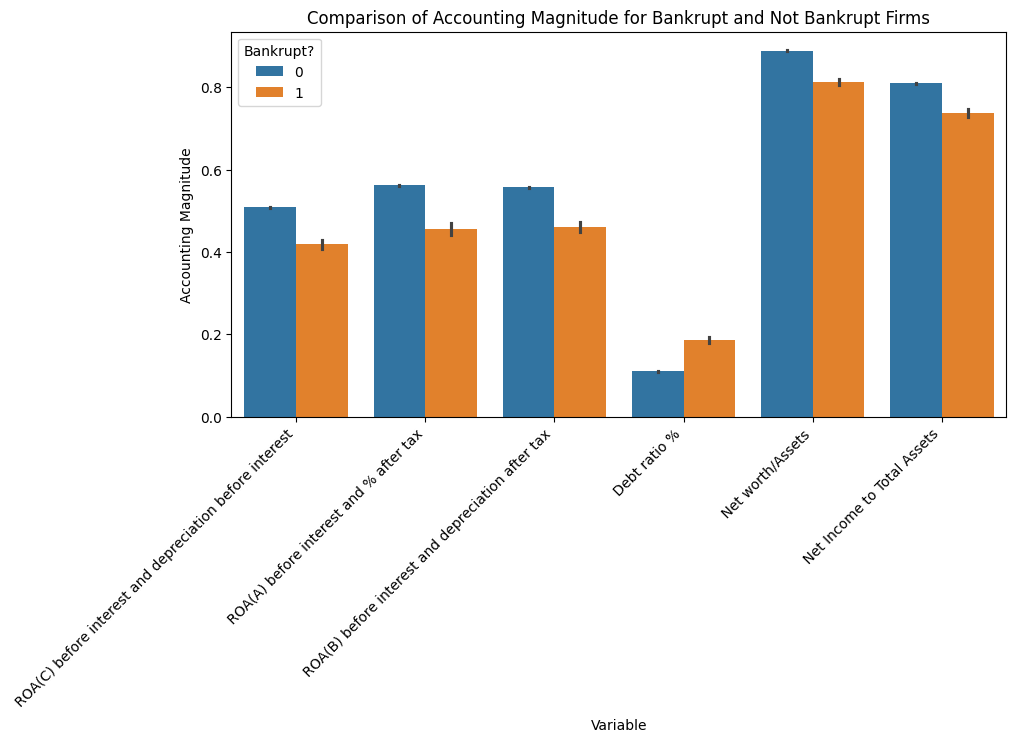

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' containing the data
# Replace 'data' with your actual DataFrame name

# Calculate the correlation coefficients
correlation_matrix = data.corr()

# Select the correlation between "Bankrupt?" and all other variables
bankrupt_correlation = correlation_matrix['Bankrupt?'].drop('Bankrupt?')

# Set a correlation threshold (absolute value) to select variables
correlation_threshold = 0.25

# Select variables with correlation above the threshold
selected_variables = bankrupt_correlation[abs(bankrupt_correlation) > correlation_threshold]

# Create a DataFrame containing only the selected variables and "Bankrupt?" column
selected_data = data[list(selected_variables.index) + ['Bankrupt?']]

# Melt the DataFrame to prepare for the bar plots
selected_data_melted = selected_data.melt(id_vars='Bankrupt?', var_name='Variable', value_name='Value')

# Plot the bar plots using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Variable', y='Value', hue='Bankrupt?', data=selected_data_melted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variable')
plt.ylabel('Accounting Magnitude')
plt.title('Comparison of Accounting Magnitude for Bankrupt and Not Bankrupt Firms')
plt.show()

# Machine Learning Models with Full Dataset

## Logistic Regression

In [308]:
from sklearn.model_selection import train_test_split

bank = data
# training set
X = bank.iloc[:, 1:].values
y = bank.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## The Target Variable revisited

/var/folders/m9/nztxhcks4s38zc7jlmjbxhrw0000gn/T/ipykernel_5766/630319542.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bank, x='Bankrupt?', palette='bwr')


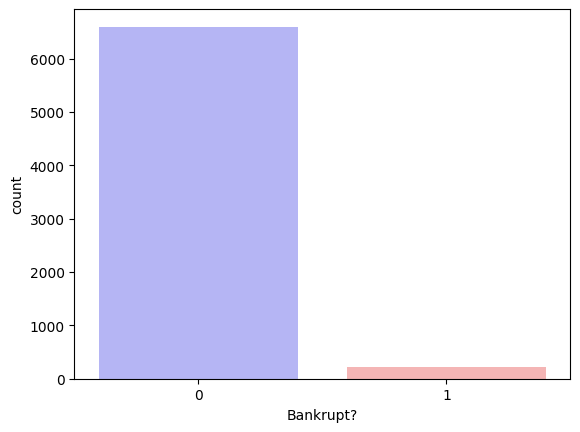

Bankrupt?
0    6599
1     220
dtype: int64

In [310]:
sns.countplot(data=bank, x='Bankrupt?', palette='bwr')
plt.show()

bank.groupby('Bankrupt?').size()

## Logistic Regression

In [312]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(max_iter=1000)  # Increase max_iter to 1000 (or any other suitable value)


# Create a logistic regression model
#logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the training and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate the confusion matrix for training and test sets
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Calculate the accuracy for training and test sets
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Confusion matrix for training set:")
print(confusion_matrix_train)
print("Accuracy for training set:", accuracy_train)

print("\nConfusion matrix for test set:")
print(confusion_matrix_test)
print("Accuracy for test set:", accuracy_test)

Confusion matrix for training set:
[[4938   14]
 [ 158    4]]
Accuracy for training set: 0.966366836136097

Confusion matrix for test set:
[[1641    6]
 [  58    0]]
Accuracy for test set: 0.9624633431085043


In [313]:
from tabulate import tabulate


# Define the confusion matrix table
table = [
    ["", "Predicted Negative", "Predicted Positive"],
    ["Actual Negative", "True Negative (TN)", "False Positive (FP)"],
    ["Actual Positive", "False Negative (FN)", "True Positive (TP)"]
]

# Print the table in a formatted way
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


╒═════════════════╤══════════════════════╤══════════════════════╕
│                 │ Predicted Negative   │ Predicted Positive   │
╞═════════════════╪══════════════════════╪══════════════════════╡
│ Actual Negative │ True Negative (TN)   │ False Positive (FP)  │
├─────────────────┼──────────────────────┼──────────────────────┤
│ Actual Positive │ False Negative (FN)  │ True Positive (TP)   │
╘═════════════════╧══════════════════════╧══════════════════════╛


In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increase iterations to ensure convergence
logreg.fit(X_train, y_train)

# Make predictions
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Compute confusion matrix for train and test sets
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Extract TN, FP, FN, TP for both training and test sets
TN_train, FP_train, FN_train, TP_train = conf_matrix_train.ravel()
TN_test, FP_test, FN_test, TP_test = conf_matrix_test.ravel()

# Accuracy scores
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Define confusion matrix tables for printing
table_train = [
    ["", "Predicted Negative", "Predicted Positive"],
    ["Actual Negative", f"True Negative (TN): {TN_train}", f"False Positive (FP): {FP_train}"],
    ["Actual Positive", f"False Negative (FN): {FN_train}", f"True Positive (TP): {TP_train}"]
]

table_test = [
    ["", "Predicted Negative", "Predicted Positive"],
    ["Actual Negative", f"True Negative (TN): {TN_test}", f"False Positive (FP): {FP_test}"],
    ["Actual Positive", f"False Negative (FN): {FN_test}", f"True Positive (TP): {TP_test}"]
]

# Print results
print("\nLogistic Regression Model Results:")
print(f"Accuracy for Training Set: {accuracy_train:.4f}")
print(f"Accuracy for Test Set: {accuracy_test:.4f}\n")

print("Confusion Matrix for Training Set:")
print(tabulate(table_train, headers="firstrow", tablefmt="fancy_grid"))

print("\nConfusion Matrix for Test Set:")
print(tabulate(table_test, headers="firstrow", tablefmt="fancy_grid"))



Logistic Regression Model Results:
Accuracy for Training Set: 0.9672
Accuracy for Test Set: 0.9611

Confusion Matrix for Training Set:
╒═════════════════╤══════════════════════════╤═════════════════════════╕
│                 │ Predicted Negative       │ Predicted Positive      │
╞═════════════════╪══════════════════════════╪═════════════════════════╡
│ Actual Negative │ True Negative (TN): 5272 │ False Positive (FP): 14 │
├─────────────────┼──────────────────────────┼─────────────────────────┤
│ Actual Positive │ False Negative (FN): 165 │ True Positive (TP): 4   │
╘═════════════════╧══════════════════════════╧═════════════════════════╛

Confusion Matrix for Test Set:
╒═════════════════╤══════════════════════════╤════════════════════════╕
│                 │ Predicted Negative       │ Predicted Positive     │
╞═════════════════╪══════════════════════════╪════════════════════════╡
│ Actual Negative │ True Negative (TN): 1311 │ False Positive (FP): 2 │
├─────────────────┼──────────────